<a href="https://colab.research.google.com/github/PrathamKumar125/Customer-Behaviour-Analysis/blob/master/Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
transactions = pd.read_csv('transaction_data.csv')
behaviors = pd.read_csv('purchase_behaviour.csv')

In [4]:
# Merge datasets
df = pd.merge(transactions, behaviors, on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [47]:
# Product profitability analysis
product_profits = (df.groupby('PROD_NBR')
                  .agg({'TOT_SALES': ['sum', 'count'],'PROD_NAME': (lambda x: ', '.join(set(x)))})
                  .sort_values(('TOT_SALES', 'sum'),ascending=False))
top_3_products = product_profits[[('PROD_NAME', '<lambda>'), ('TOT_SALES', 'sum'), ('TOT_SALES', 'count')]].head(3)
top_3_products = top_3_products.reset_index()
top_3_products

PROD_NBR                                 PROD_NAME TOT_SALES      
                                            <lambda>       sum count
0        4          Dorito Corn Chp     Supreme 380g   40352.0  3185
1       14    Smiths Crnkle Chip  Orgnl Big Bag 380g   36367.6  3233
2       16  Smiths Crinkle Chips Salt & Vinegar 330g   34804.2  3197

In [34]:
# Customer segmentation
customer_value = (df.groupby('LYLTY_CARD_NBR')
                 .agg({
                     'TOT_SALES': ['sum', 'count'],
                     'LIFESTAGE': 'first',
                     'PREMIUM_CUSTOMER': 'first'

                 }))
customer_value.head()

TOT_SALES                     LIFESTAGE PREMIUM_CUSTOMER
                     sum count                   first            first
LYLTY_CARD_NBR                                                         
1000                 6.0     1   YOUNG SINGLES/COUPLES          Premium
1002                 2.7     1   YOUNG SINGLES/COUPLES       Mainstream
1003                 6.6     2          YOUNG FAMILIES           Budget
1004                 1.9     1   OLDER SINGLES/COUPLES       Mainstream
1005                 2.8     1  MIDAGE SINGLES/COUPLES       Mainstream

In [31]:
# Define loyal customers (top 20% by purchase value)
loyalty_threshold = customer_value[('TOT_SALES', 'sum')].quantile(0.8)
loyal_customers = customer_value[customer_value[('TOT_SALES', 'sum')] >= loyalty_threshold]
loyal_customers.head()

TOT_SALES                     LIFESTAGE PREMIUM_CUSTOMER
                     sum count                   first            first
LYLTY_CARD_NBR                                                         
3004                48.0     5                RETIREES          Premium
3007                48.4     5  MIDAGE SINGLES/COUPLES       Mainstream
3014                68.0     7   YOUNG SINGLES/COUPLES       Mainstream
3015                53.6     6          YOUNG FAMILIES           Budget
3022                80.9     9          YOUNG FAMILIES           Budget

In [27]:
# Analyze loyal customer characteristics
loyal_profile = {
    'marital_status': loyal_customers[('LIFESTAGE', 'first')].mode()[0],
    'customer_type': loyal_customers[('PREMIUM_CUSTOMER', 'first')].mode()[0],
    'total_spending': loyal_customers[('TOT_SALES', 'sum')].mean()
}
loyal_profile

{'marital_status': 'OLDER FAMILIES',
 'customer_type': 'Budget',
 'total_spending': 58.894925700198584}

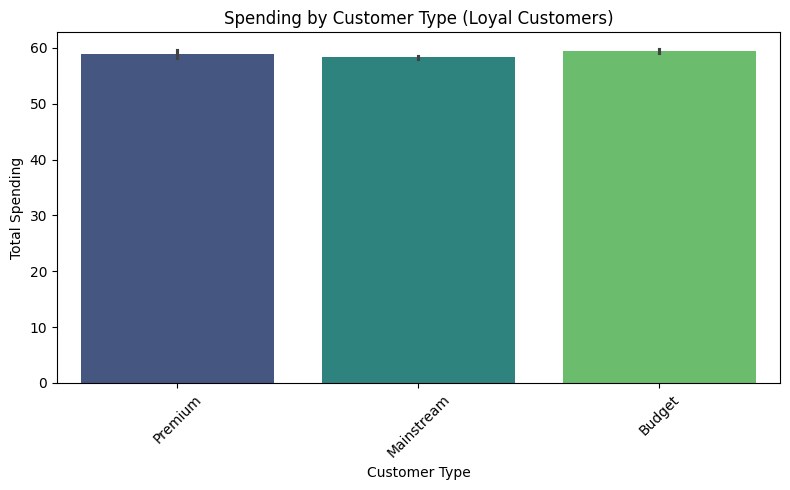

In [30]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=loyal_customers.reset_index(),
            x=('PREMIUM_CUSTOMER', 'first'),
            y=('TOT_SALES', 'sum'),
            hue=('PREMIUM_CUSTOMER', 'first'),
            palette="viridis",
            legend=False)
plt.title('Spending by Customer Type (Loyal Customers)')
plt.xlabel('Customer Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()